In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os

In [38]:
# Import Data Into Pandas DataFrame

file = 'C:\Data\Project_1_Folder\SUV_Data_Total\SUV_Data_Total2.csv'
df_all = pd.read_csv(file)

In [39]:
os.getcwd()

'C:\\Users\\briti\\smu\\git repos\\Project 1\\project1\\output_data\\andrew'

In [6]:
df_all.dtypes

vf_BodyClass             object
brandName                object
vf_Make                  object
modelName                object
vf_Model                 object
vf_ModelID              float64
vf_ModelYear            float64
mileage                   int64
askPrice                  int64
msrp                      int64
vf_BasePrice            float64
askPrice.1                int64
color                    object
interiorColor            object
vf_BodyCabType           object
vf_Doors                float64
vf_EngineCylinders      float64
vf_EngineHP             float64
vf_FuelTypePrimary       object
vf_FuelTypeSecondary     object
vf_Series                object
vf_Series2               object
vf_SteeringLocation      object
vf_TransmissionStyle     object
vf_Trim                  object
vf_Trim2                 object
vf_Turbo                 object
vin                      object
dtype: object

In [7]:
df_all.describe()

,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,vf_BasePrice,askPrice.1,vf_Doors,vf_EngineCylinders,vf_EngineHP
count,553858.000000,553874.000000,5.538740e+05,5.538740e+05,5.538740e+05,151100.000000,5.538740e+05,545909.000000,541058.000000,308900.000000
mean,3042.676217,2013.962735,6.284800e+04,2.528368e+05,2.670779e+05,39235.400973,2.528368e+05,4.093671,5.401292,255.355634
std,3376.437195,4.298945,5.313645e+04,2.235001e+07,2.286612e+07,14566.551527,2.235001e+07,0.416944,1.298806,64.141565
min,1703.000000,1984.000000,1.000000e+03,0.000000e+00,0.000000e+00,17995.000000,0.000000e+00,2.000000,3.000000,111.304814
25%,1820.000000,2012.000000,2.361500e+04,9.972000e+03,1.050000e+04,27895.000000,9.972000e+03,4.000000,4.000000,200.000000
50%,1865.000000,2015.000000,4.501200e+04,1.820600e+04,1.952600e+04,36025.000000,1.820600e+04,4.000000,6.000000,250.000000
75%,2241.000000,2017.000000,9.173300e+04,2.795200e+04,2.976400e+04,45560.000000,2.795200e+04,4.000000,6.000000,290.000000
max,27165.000000,2020.000000,2.228027e+06,2.147484e+09,2.147484e+09,395731.000000,2.147484e+09,5.000000,12.000000,815.341290


In [8]:
# elimiante cars w/o a proce since we will be leaning on price as a main component

df_clean = df_all.loc[(df_all['askPrice']>0) & (df_all['askPrice']<200000) & (df_all['mileage']<300000)]

mileage_per_year=(df_clean['mileage'] / (2020 - df_clean['vf_ModelYear']))

car_age = (2020-df_clean['vf_ModelYear'])

df_clean.insert(6, 'Vehicle Age', car_age)
df_clean.insert(8, 'Miles Driven Per Year', mileage_per_year)

df_clean = df_clean.drop(['modelName', 'vf_Make', 'vf_FuelTypeSecondary', 'vf_Series2', 'vf_SteeringLocation', 'vf_TransmissionStyle', 'vf_Trim2', 'vf_Turbo', 'vf_Doors', 'vf_BodyCabType', ], axis=1)

df_clean.head(25)

,vf_BodyClass,brandName,vf_Model,vf_ModelID,Vehicle Age,vf_ModelYear,Miles Driven Per Year,mileage,askPrice,msrp,vf_BasePrice,askPrice.1,color,interiorColor,vf_EngineCylinders,vf_EngineHP,vf_FuelTypePrimary,vf_Series,vf_Trim,vin
0,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,Wrangler,1943.0,3.0,2017.0,3214.000000,9642,39962,39962,37445.0,39962,Black Clearcoat,Black Cloth,6.0,285.0,Gasoline,JK,Unlimited Rubicon,322d48b4c60b477e2f9ed6b702a04e79de7a7fa2896521...
2,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,Grand Cherokee,1949.0,5.0,2015.0,10092.000000,50460,32962,32962,NaN,32962,Cashmere Pearlcoat,Light Frost/Brown Leather,8.0,NaN,Gasoline,NaN,Overland,2ef50172db46389b72f4e99178a8e7711de2adf0658249...
3,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,Wrangler JK,25197.0,2.0,2018.0,2922.000000,5844,35962,35962,NaN,35962,Firecracker Red Clearcoat,Black,6.0,285.0,Gasoline,Unlimited Sahara,JK (Open Body),6cb1784ba994af798c878b3f0d5270e893d8605cf47f94...
6,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FORD,Escape,1798.0,4.0,2016.0,8006.500000,32026,18962,18962,NaN,18962,Ruby Red Metallic Tinted Clearcoat,Medium Light Stone,4.0,178.0,Gasoline,Titanium,NaN,8ee60b54b5fba668f4766d4209b6aabedf3ea10a703fe2...
10,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,Cherokee,1945.0,3.0,2017.0,2652.666667,7958,23462,23462,25645.0,23462,Diamond Black Crystal Pearlcoat,Black Cloth,6.0,271.0,Gasoline,KL,Latitude(USMex) Longitude(BUX) North(Can),1ed760e28dc35ab6945f53a563f9cbcf894ff39c3b8dde...
13,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FORD,Expedition EL,25742.0,3.0,2017.0,18367.000000,55101,25962,25962,49835.0,25962,Oxford White,Ebony,6.0,365.0,Flexible Fuel Vehicle (FFV),XLT/King Ranch,NaN,4abdc6bd81a6b37a0536345f4b5c1e3fea3c192a4f6710...
14,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,CADILLAC,Escalade,1843.0,4.0,2016.0,7603.750000,30415,57962,57962,NaN,57962,Black Raven,Jet Black,8.0,NaN,Gasoline,ESV Premium Collection,NaN,19c40fbe4c474c8caeff3e275604537940edb353895f3e...
23,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,CHEVROLET,Traverse,1853.0,3.0,2017.0,8048.000000,24144,24462,24462,26750.0,24462,Summit White,Dark Titanium/Light Titanium Cloth,6.0,NaN,Gasoline,1LT,NaN,184e61f62b3f4c4ada141d978837d027b3348742af8db8...
29,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FORD,Edge,1797.0,3.0,2017.0,4617.000000,13851,34962,34962,40900.0,34962,White Platinum Metallic Tri-Coat,Ebony,6.0,NaN,Gasoline,Sport,NaN,b5d34fe8483447e4f4dc30800ca776f3ef37e9bdc47464...
32,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,CADILLAC,Escalade,1843.0,7.0,2013.0,13307.571429,93153,28962,28962,NaN,28962,Black Raven,Cashmere,8.0,NaN,Gasoline,ESV Luxury Collection,NaN,d8bd331e632ecabb2ae4d6bc992e4a2565a5b105bb2da1...


In [9]:
print('Number of Records: '+str(len(df_clean['vin'])))

Number of Records: 472832


In [10]:
df_clean = df_all.loc[df_all['askPrice']>0]
df_clean.head(51)

,vf_BodyClass,brandName,vf_Make,modelName,vf_Model,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,...,vf_FuelTypePrimary,vf_FuelTypeSecondary,vf_Series,vf_Series2,vf_SteeringLocation,vf_TransmissionStyle,vf_Trim,vf_Trim2,vf_Turbo,vin
0,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,JEEP,Wrangler,Wrangler,1943.0,2017.0,9642,39962,39962,...,Gasoline,NaN,JK,NaN,Left Hand Drive (LHD),NaN,Unlimited Rubicon,NaN,No,322d48b4c60b477e2f9ed6b702a04e79de7a7fa2896521...
2,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,JEEP,Grand Cherokee,Grand Cherokee,1949.0,2015.0,50460,32962,32962,...,Gasoline,NaN,NaN,NaN,Left Hand Drive (LHD),NaN,Overland,NaN,No,2ef50172db46389b72f4e99178a8e7711de2adf0658249...
3,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,JEEP,Wrangler JK,Wrangler JK,25197.0,2018.0,5844,35962,35962,...,Gasoline,NaN,Unlimited Sahara,NaN,Left Hand Drive (LHD),NaN,JK (Open Body),NaN,No,6cb1784ba994af798c878b3f0d5270e893d8605cf47f94...
6,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FORD,FORD,Escape,Escape,1798.0,2016.0,32026,18962,18962,...,Gasoline,NaN,Titanium,NaN,NaN,NaN,NaN,NaN,NaN,8ee60b54b5fba668f4766d4209b6aabedf3ea10a703fe2...
10,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,JEEP,Cherokee,Cherokee,1945.0,2017.0,7958,23462,23462,...,Gasoline,NaN,KL,NaN,Left Hand Drive (LHD),NaN,Latitude(USMex) Longitude(BUX) North(Can),NaN,No,1ed760e28dc35ab6945f53a563f9cbcf894ff39c3b8dde...
13,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FORD,FORD,Expedition EL,Expedition EL,25742.0,2017.0,55101,25962,25962,...,Flexible Fuel Vehicle (FFV),Gasoline,XLT/King Ranch,NaN,Left Hand Drive (LHD),NaN,NaN,NaN,NaN,4abdc6bd81a6b37a0536345f4b5c1e3fea3c192a4f6710...
14,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,CADILLAC,CADILLAC,Escalade,Escalade,1843.0,2016.0,30415,57962,57962,...,Gasoline,NaN,ESV Premium Collection,NaN,NaN,NaN,NaN,NaN,NaN,19c40fbe4c474c8caeff3e275604537940edb353895f3e...
23,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,CHEVROLET,CHEVROLET,Traverse,Traverse,1853.0,2017.0,24144,24462,24462,...,Gasoline,NaN,1LT,NaN,Left Hand Drive (LHD),Automatic,NaN,NaN,NaN,184e61f62b3f4c4ada141d978837d027b3348742af8db8...
29,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FORD,FORD,Edge,Edge,1797.0,2017.0,13851,34962,34962,...,Gasoline,NaN,Sport,NaN,Left Hand Drive (LHD),NaN,NaN,NaN,NaN,b5d34fe8483447e4f4dc30800ca776f3ef37e9bdc47464...
32,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,CADILLAC,CADILLAC,Escalade,Escalade,1843.0,2013.0,93153,28962,28962,...,Gasoline,NaN,ESV Luxury Collection,NaN,NaN,NaN,NaN,NaN,NaN,d8bd331e632ecabb2ae4d6bc992e4a2565a5b105bb2da1...


In [11]:
print('Number of Records: '+str(len(df_clean['vin'])))

Number of Records: 473047


In [12]:
df_clean1 = df_clean.replace('nan',np.nan)
df_clean1.head(50)

,vf_BodyClass,brandName,vf_Make,modelName,vf_Model,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,...,vf_FuelTypePrimary,vf_FuelTypeSecondary,vf_Series,vf_Series2,vf_SteeringLocation,vf_TransmissionStyle,vf_Trim,vf_Trim2,vf_Turbo,vin
0,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,JEEP,Wrangler,Wrangler,1943.0,2017.0,9642,39962,39962,...,Gasoline,NaN,JK,NaN,Left Hand Drive (LHD),NaN,Unlimited Rubicon,NaN,No,322d48b4c60b477e2f9ed6b702a04e79de7a7fa2896521...
2,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,JEEP,Grand Cherokee,Grand Cherokee,1949.0,2015.0,50460,32962,32962,...,Gasoline,NaN,NaN,NaN,Left Hand Drive (LHD),NaN,Overland,NaN,No,2ef50172db46389b72f4e99178a8e7711de2adf0658249...
3,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,JEEP,Wrangler JK,Wrangler JK,25197.0,2018.0,5844,35962,35962,...,Gasoline,NaN,Unlimited Sahara,NaN,Left Hand Drive (LHD),NaN,JK (Open Body),NaN,No,6cb1784ba994af798c878b3f0d5270e893d8605cf47f94...
6,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FORD,FORD,Escape,Escape,1798.0,2016.0,32026,18962,18962,...,Gasoline,NaN,Titanium,NaN,NaN,NaN,NaN,NaN,NaN,8ee60b54b5fba668f4766d4209b6aabedf3ea10a703fe2...
10,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,JEEP,JEEP,Cherokee,Cherokee,1945.0,2017.0,7958,23462,23462,...,Gasoline,NaN,KL,NaN,Left Hand Drive (LHD),NaN,Latitude(USMex) Longitude(BUX) North(Can),NaN,No,1ed760e28dc35ab6945f53a563f9cbcf894ff39c3b8dde...
13,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FORD,FORD,Expedition EL,Expedition EL,25742.0,2017.0,55101,25962,25962,...,Flexible Fuel Vehicle (FFV),Gasoline,XLT/King Ranch,NaN,Left Hand Drive (LHD),NaN,NaN,NaN,NaN,4abdc6bd81a6b37a0536345f4b5c1e3fea3c192a4f6710...
14,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,CADILLAC,CADILLAC,Escalade,Escalade,1843.0,2016.0,30415,57962,57962,...,Gasoline,NaN,ESV Premium Collection,NaN,NaN,NaN,NaN,NaN,NaN,19c40fbe4c474c8caeff3e275604537940edb353895f3e...
23,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,CHEVROLET,CHEVROLET,Traverse,Traverse,1853.0,2017.0,24144,24462,24462,...,Gasoline,NaN,1LT,NaN,Left Hand Drive (LHD),Automatic,NaN,NaN,NaN,184e61f62b3f4c4ada141d978837d027b3348742af8db8...
29,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FORD,FORD,Edge,Edge,1797.0,2017.0,13851,34962,34962,...,Gasoline,NaN,Sport,NaN,Left Hand Drive (LHD),NaN,NaN,NaN,NaN,b5d34fe8483447e4f4dc30800ca776f3ef37e9bdc47464...
32,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,CADILLAC,CADILLAC,Escalade,Escalade,1843.0,2013.0,93153,28962,28962,...,Gasoline,NaN,ESV Luxury Collection,NaN,NaN,NaN,NaN,NaN,NaN,d8bd331e632ecabb2ae4d6bc992e4a2565a5b105bb2da1...


In [13]:
df_clean1['color'].isnull().sum()

11624

In [14]:
col_list = df_clean1.columns.tolist()
num_col = len(col_list)
num_nan_list = []
num_unq_list = []
per_nan_list = []

for x in range(num_col):
    num_nan_list.append(df_clean1[col_list[x]].isnull().sum())

for x in range(num_col):
    num_unq_list.append(df_clean1[col_list[x]].nunique())
    
for x in range(num_col):
    per_nan_list.append('{:,.2f}%'.format(((num_nan_list[x])/(len(df_clean1['vin'])))*100))

analysis_dict = {'Column Name':col_list,
                 'Number Missing':num_nan_list,
                 'Percentage Missing': per_nan_list,
                 'Number Unique Items': num_unq_list
                 }
analysis_df = pd.DataFrame(analysis_dict)
analysis_df.set_index(['Column Name'], inplace=True)
analysis_df.head(31)

,Number Missing,Percentage Missing,Number Unique Items
Column Name,,,
vf_BodyClass,0,0.00%,1
brandName,0,0.00%,44
vf_Make,0,0.00%,44
modelName,13,0.00%,178
vf_Model,13,0.00%,178
vf_ModelID,13,0.00%,179
vf_ModelYear,0,0.00%,33
mileage,0,0.00%,90923
askPrice,0,0.00%,32568


In [15]:
# Analyze Unique Values in BodyCabType
# Remove As Identifiers are Not Descrptive Enough

df_clean1.groupby('vf_BodyCabType')['vin'].count()

vf_BodyCabType
Extra/Super/ Quad/Double/King/Extended       2
Not Applicable                            2328
Name: vin, dtype: int64

In [16]:
df_clean2 = df_clean1[['brandName',
                       'modelName',
                       'vf_ModelID',
                       'vf_ModelYear',
                       'mileage',
                       'askPrice',
                       'msrp',
                       'color',
                       'vf_EngineCylinders',
                       'vf_FuelTypePrimary',
                       'vin'
                      ]]
df_clean2.head(50)

,brandName,modelName,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,color,vf_EngineCylinders,vf_FuelTypePrimary,vin
0,JEEP,Wrangler,1943.0,2017.0,9642,39962,39962,Black Clearcoat,6.0,Gasoline,322d48b4c60b477e2f9ed6b702a04e79de7a7fa2896521...
2,JEEP,Grand Cherokee,1949.0,2015.0,50460,32962,32962,Cashmere Pearlcoat,8.0,Gasoline,2ef50172db46389b72f4e99178a8e7711de2adf0658249...
3,JEEP,Wrangler JK,25197.0,2018.0,5844,35962,35962,Firecracker Red Clearcoat,6.0,Gasoline,6cb1784ba994af798c878b3f0d5270e893d8605cf47f94...
6,FORD,Escape,1798.0,2016.0,32026,18962,18962,Ruby Red Metallic Tinted Clearcoat,4.0,Gasoline,8ee60b54b5fba668f4766d4209b6aabedf3ea10a703fe2...
10,JEEP,Cherokee,1945.0,2017.0,7958,23462,23462,Diamond Black Crystal Pearlcoat,6.0,Gasoline,1ed760e28dc35ab6945f53a563f9cbcf894ff39c3b8dde...
13,FORD,Expedition EL,25742.0,2017.0,55101,25962,25962,Oxford White,6.0,Flexible Fuel Vehicle (FFV),4abdc6bd81a6b37a0536345f4b5c1e3fea3c192a4f6710...
14,CADILLAC,Escalade,1843.0,2016.0,30415,57962,57962,Black Raven,8.0,Gasoline,19c40fbe4c474c8caeff3e275604537940edb353895f3e...
23,CHEVROLET,Traverse,1853.0,2017.0,24144,24462,24462,Summit White,6.0,Gasoline,184e61f62b3f4c4ada141d978837d027b3348742af8db8...
29,FORD,Edge,1797.0,2017.0,13851,34962,34962,White Platinum Metallic Tri-Coat,6.0,Gasoline,b5d34fe8483447e4f4dc30800ca776f3ef37e9bdc47464...
32,CADILLAC,Escalade,1843.0,2013.0,93153,28962,28962,Black Raven,8.0,Gasoline,d8bd331e632ecabb2ae4d6bc992e4a2565a5b105bb2da1...


In [17]:
df_clean2.dropna(axis=0, how='any', inplace=True)

<ipython-input-17-4c73de67bed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean2.dropna(axis=0, how='any', inplace=True)


In [18]:
print('Number of Records: '+str(len(df_clean2['vin'])))

Number of Records: 446013


In [19]:
col_list = df_clean2.columns.tolist()
num_col = len(col_list)
num_nan_list = []
num_unq_list = []
per_nan_list = []

for x in range(num_col):
    num_nan_list.append(df_clean2[col_list[x]].isnull().sum())

for x in range(num_col):
    num_unq_list.append(df_clean2[col_list[x]].nunique())
    
for x in range(num_col):
    per_nan_list.append('{:,.2f}%'.format(((num_nan_list[x])/(len(df_clean2['vin'])))*100))

analysis_dict = {'Column Name':col_list,
                 'Number Missing':num_nan_list,
                 'Percentage Missing': per_nan_list,
                 'Number Unique Items': num_unq_list
                 }
analysis_df = pd.DataFrame(analysis_dict)
analysis_df.set_index(['Column Name'], inplace=True)
analysis_df.head(31)

,Number Missing,Percentage Missing,Number Unique Items
Column Name,,,
brandName,0,0.00%,40
modelName,0,0.00%,161
vf_ModelID,0,0.00%,162
vf_ModelYear,0,0.00%,33
mileage,0,0.00%,87280
askPrice,0,0.00%,31639
msrp,0,0.00%,31593
color,0,0.00%,3591
vf_EngineCylinders,0,0.00%,7


In [20]:
df_clean3 = df_clean2.drop_duplicates(subset='vin',keep='first')
print('Number of Records: '+str(len(df_clean3['vin'])))

Number of Records: 152655


In [21]:
df_clean3.to_csv('C:\Data\SUV_Clean_Total.csv',index=False,header=True)
print('File_Saved')

File_Saved


In [22]:
df_clean3.describe()

,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,vf_EngineCylinders
count,152655.000000,152655.000000,152655.000000,1.526550e+05,1.526550e+05,152655.000000
mean,3084.985503,2014.922498,51418.870781,7.282081e+05,7.388848e+05,5.307255
std,3559.292051,3.412852,42605.669295,3.885890e+07,3.901457e+07,1.277254
min,1703.000000,1985.000000,1000.000000,1.000000e+00,1.000000e+00,3.000000
25%,1814.000000,2014.000000,20838.500000,1.499900e+04,1.599500e+04,4.000000
50%,1865.000000,2016.000000,38125.000000,2.149000e+04,2.297700e+04,6.000000
75%,2147.000000,2017.000000,73013.500000,3.029150e+04,3.200000e+04,6.000000
max,27165.000000,2020.000000,949278.000000,2.147484e+09,2.147484e+09,12.000000


In [23]:
df_clean3.head(30)

,brandName,modelName,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,color,vf_EngineCylinders,vf_FuelTypePrimary,vin
0,JEEP,Wrangler,1943.0,2017.0,9642,39962,39962,Black Clearcoat,6.0,Gasoline,322d48b4c60b477e2f9ed6b702a04e79de7a7fa2896521...
2,JEEP,Grand Cherokee,1949.0,2015.0,50460,32962,32962,Cashmere Pearlcoat,8.0,Gasoline,2ef50172db46389b72f4e99178a8e7711de2adf0658249...
3,JEEP,Wrangler JK,25197.0,2018.0,5844,35962,35962,Firecracker Red Clearcoat,6.0,Gasoline,6cb1784ba994af798c878b3f0d5270e893d8605cf47f94...
6,FORD,Escape,1798.0,2016.0,32026,18962,18962,Ruby Red Metallic Tinted Clearcoat,4.0,Gasoline,8ee60b54b5fba668f4766d4209b6aabedf3ea10a703fe2...
10,JEEP,Cherokee,1945.0,2017.0,7958,23462,23462,Diamond Black Crystal Pearlcoat,6.0,Gasoline,1ed760e28dc35ab6945f53a563f9cbcf894ff39c3b8dde...
13,FORD,Expedition EL,25742.0,2017.0,55101,25962,25962,Oxford White,6.0,Flexible Fuel Vehicle (FFV),4abdc6bd81a6b37a0536345f4b5c1e3fea3c192a4f6710...
14,CADILLAC,Escalade,1843.0,2016.0,30415,57962,57962,Black Raven,8.0,Gasoline,19c40fbe4c474c8caeff3e275604537940edb353895f3e...
23,CHEVROLET,Traverse,1853.0,2017.0,24144,24462,24462,Summit White,6.0,Gasoline,184e61f62b3f4c4ada141d978837d027b3348742af8db8...
29,FORD,Edge,1797.0,2017.0,13851,34962,34962,White Platinum Metallic Tri-Coat,6.0,Gasoline,b5d34fe8483447e4f4dc30800ca776f3ef37e9bdc47464...
32,CADILLAC,Escalade,1843.0,2013.0,93153,28962,28962,Black Raven,8.0,Gasoline,d8bd331e632ecabb2ae4d6bc992e4a2565a5b105bb2da1...


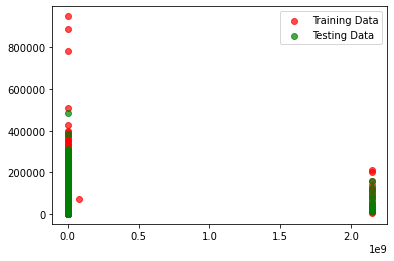

In [24]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = df_clean3['askPrice'].values
y = df_clean3['mileage'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

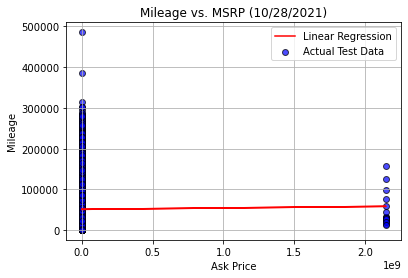

The Overall Accuracry of the Model is: 0.00%
The R^2 Value of the Linear Regression Model is: -3.475331800473214e-05
The Linear Equation of the Regression is: Y=0.00X + 51,352.64


In [25]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('Mileage vs. MSRP (10/28/2021)')
plt.xlabel('Ask Price')
plt.ylabel('Mileage')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

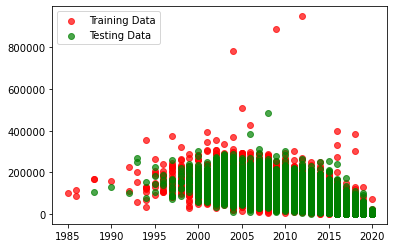

In [26]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = df_clean3['vf_ModelYear'].values
y = df_clean3['mileage'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

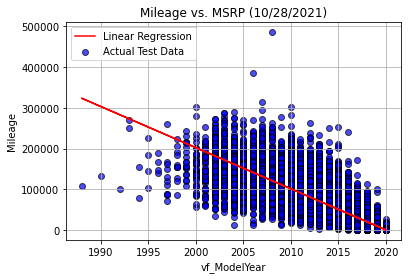

The Overall Accuracry of the Model is: 65.60%
The R^2 Value of the Linear Regression Model is: 0.6625981269804007
The Linear Equation of the Regression is: Y=-10,107.73X + 20,417,653.02


In [27]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('Mileage vs. MSRP (10/28/2021)')
plt.xlabel('vf_ModelYear')
plt.ylabel('Mileage')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

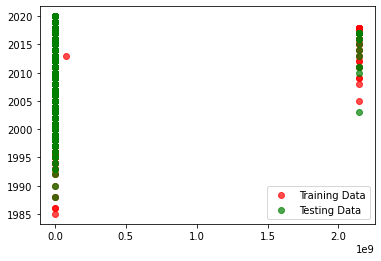

In [28]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = df_clean3['askPrice'].values
y = df_clean3['vf_ModelYear'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

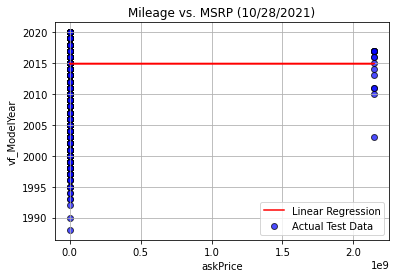

The Overall Accuracry of the Model is: 0.00%
The R^2 Value of the Linear Regression Model is: -6.548081850077381e-07
The Linear Equation of the Regression is: Y=0.00X + 2,014.92


In [29]:
#3. Train the Model on the Training Set

LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

# Use Model to Predict on Test Data

prediction = LR.predict(x_test.reshape(-1,1))

# Plot Prediction Line Against Actual Test Data

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('Mileage vs. MSRP (10/28/2021)')
plt.xlabel('askPrice')
plt.ylabel('vf_ModelYear')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('The Overall Accuracry of the Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value of the Linear Regression Model is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

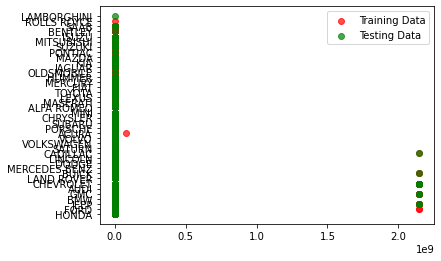

In [30]:
# Linear Regression Using SKLearn

#1. Determine X & y

x = df_clean3['askPrice'].values
y = df_clean3['brandName'].values

#2. Split the Dataset in Training Set and Test Set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

# Visualize Data Split

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

In [31]:
# The maximum x value for our chart will be 100
x_limit = 6000

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
data = [random.random() for value in x_axis]

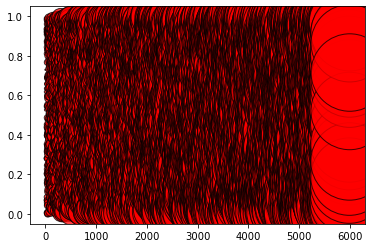

In [32]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

In [33]:
# Set x axis and tick locations
x_axis = np.arange(len(df_clean3))
tick_locations = [value+0.4 for value in x_axis]

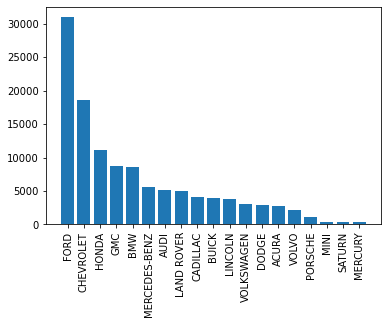

In [34]:
# Create a list indicating where to write x labels and set figure size to adjust for space
make_list = df_clean3['brandName'].value_counts().index.to_list()
make_amount = df_clean3['brandName'].value_counts().to_list()
plt.bar(make_list[1:20], make_amount[1:20])
plt.xticks(rotation=90)
plt.show ()

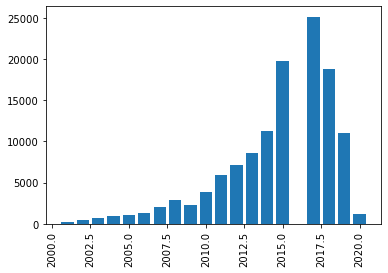

In [35]:
# Create a list indicating where to write x labels and set figure size to adjust for space
make_list = df_clean3['vf_ModelYear'].value_counts().index.to_list()
make_amount = df_clean3['vf_ModelYear'].value_counts().to_list()
plt.bar(make_list[1:20], make_amount[1:20])
plt.xticks(rotation=90)
plt.show ()